## Introduction to the Interstellar Medium
### Jonathan Williams

### Figure 10.7: Map of integrated HI and CO showing an atomic envelope around the Rosette molecular cloud

In [1]:
#### the HI data were taken at the Arecibo observatory and published in Williams & Maddalena 1994 (https://ui.adsabs.harvard.edu/abs/1996ApJ...464..247W)
#### the CO data are the same as in Figure 7.7 taken with the Five College Radio Astronomy Observatory

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from astropy.io import fits
from astropy.convolution import Gaussian2DKernel, interpolate_replace_nans
%matplotlib inline

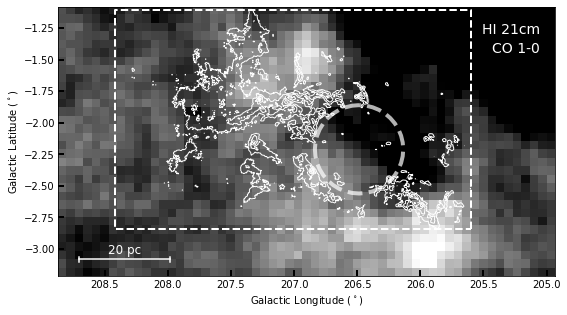

In [5]:
fig = plt.figure(figsize=(8,6))

hdu = fits.open('rosette_HI.fits')
im = hdu[0].data.squeeze()
hd = hdu[0].header
#print(hd)
hdu.close()

rad2deg = 180/np.pi
nx = hd['naxis1']
x0 = hd['crval1'] * rad2deg + 360
dx = hd['cdelt1'] * rad2deg
i0 = hd['crpix1']
ny = hd['naxis2']
y0 = hd['crval2'] * rad2deg
dy = hd['cdelt2'] * rad2deg
j0 = hd['crpix2']
nv = hd['naxis3']
v0 = hd['crval3'] / 1000
dv = hd['cdelt3'] / 1000
k0 = hd['crpix3']

imin, imax = 0, nx-1
xmin, xmax = x0+(imax-i0)*dx, x0+(imin-i0)*dx
jmin, jmax = 0, ny-1
ymin, ymax = y0+(jmin-j0)*dy, y0+(jmax-j0)*dy
extent = [xmax, xmin, ymin, ymax]
#print(extent)
#im_crop = im[jmin:jmax, imin:imax]

# integrate over in 5-25 km/s velocity
kmin, kmax = 0, nv-1
kmin, kmax = 10,51
vmin, vmax = v0+(kmin-k0)*dv, v0+(kmax-k0)*dv
#print(vmin,vmax)
im_crop = np.sum(im[kmin:kmax, jmin:jmax, imin:imax], axis=0)
im_max = im_crop.max()
#print(im_crop.min(),im_crop.max())

hdu2 = fits.open('../molecules/rosette_CO_FCRAO.fits')
im2 = hdu2[0].data
hd2 = hdu2[0].header
hdu2.close()
nx2 = hd2['naxis1']
x2  = hd2['crval1']
dx2 = hd2['cdelt1']
i2  = hd2['crpix1']
ny2 = hd2['naxis2']
y2  = hd2['crval2']
dy2 = hd2['cdelt2']
j2  = hd2['crpix2']
xaxis2 = x2+(5+np.arange(nx2-10)-i2)*dx2
yaxis2 = y2+(5+np.arange(ny2-25)-j2)*dy2
xmin2, xmax2 = xaxis2.min(), xaxis2.max()
ymin2, ymax2 = yaxis2.min(), yaxis2.max()
im2_crop = im2[5:ny2-20, 5:nx2-5]
levs2 = (1+np.arange(10))*10

# plot HI in gray scale and CO as contours
ax = fig.add_subplot(111)
ax.imshow(im_crop, cmap='gray', origin='lower', extent=extent, vmin=1050, vmax=1350)
ax.contour(xaxis2, yaxis2, im2_crop, levs2, colors='white', linewidths=1)

# plot boundary of CO map
plt.plot([xmin2,xmin2,xmax2,xmax2,xmin2], [ymin2,ymax2,ymax2,ymin2,ymin2], 'w--', lw=2)

# some annotation
plt.plot((208.7, 207.984), (-3.08, -3.08), color='white', lw=1.5)
plt.plot((208.7, 208.7), (-3.1, -3.06), color='white', lw=1.5)
plt.plot((207.984, 207.984), (-3.1, -3.06), color='white', lw=1.5)
ax.text(208.342, -3.04, "20 pc", {'color': 'w', 'fontsize': 12}, ha='center')
rHII = 0.35
theta = np.arange(41)*np.pi/20
xHII = 206.485 + rHII*np.sin(theta)
yHII = -2.21 + rHII*np.cos(theta)
plt.plot(xHII, yHII, color='white', linestyle='dashed', linewidth=4, alpha=0.7)
ax.text(0.97,0.9,r'HI 21cm', {'color': 'w', 'fontsize': 14}, ha='right', transform=ax.transAxes)
ax.text(0.97,0.83,r'CO 1-0', {'color': 'w', 'fontsize': 14}, ha='right', transform=ax.transAxes)

ax.tick_params(direction='in', length=6, width=2, colors='black')
ax.xaxis.set_major_formatter(FormatStrFormatter('%5.1f'))
ax.set_xlim(xmax, xmin)
ax.set_ylim(ymin, ymax)
ax.set_xlabel(r'Galactic Longitude ($^\circ$)')
ax.set_ylabel(r'Galactic Latitude ($^\circ$)')

plt.tight_layout()
plt.savefig('rosette_HI_CO.pdf')